# Steam API

In [21]:
import pandas as pd
import requests
# Get the api key
with open('steam_apikey.txt', 'r') as file:
    apikey = file.read()

base_url = 'http://api.steampowered.com/'
endpoint = 'IPlayerService/GetOwnedGames/v0001/?'
steamid = '76561198039160689'

url = base_url + endpoint + 'key=' + apikey + '&steamid=' + steamid + '&include_appinfo=true' + '&format=json'


In [22]:
r = requests.get(url)

r.json()

{'response': {'game_count': 301,
  'games': [{'appid': 20,
    'name': 'Team Fortress Classic',
    'playtime_forever': 0,
    'img_icon_url': '38ea7ebe3c1abbbbf4eabdbef174c41a972102b9',
    'playtime_windows_forever': 0,
    'playtime_mac_forever': 0,
    'playtime_linux_forever': 0,
    'playtime_deck_forever': 0,
    'rtime_last_played': 0,
    'content_descriptorids': [2, 5],
    'playtime_disconnected': 0},
   {'appid': 50,
    'name': 'Half-Life: Opposing Force',
    'playtime_forever': 0,
    'img_icon_url': '04e81206c10e12416908c72c5f22aad411b3aeef',
    'playtime_windows_forever': 0,
    'playtime_mac_forever': 0,
    'playtime_linux_forever': 0,
    'playtime_deck_forever': 0,
    'rtime_last_played': 0,
    'content_descriptorids': [2, 5],
    'playtime_disconnected': 0},
   {'appid': 70,
    'name': 'Half-Life',
    'playtime_forever': 0,
    'img_icon_url': '95be6d131fc61f145797317ca437c9765f24b41c',
    'playtime_windows_forever': 0,
    'playtime_mac_forever': 0,
    'pl

In [ ]:
steam_df = pd.DataFrame(pd.DataFrame(r.json()).values[1][0])

# Remove less helpful columns
steam_df = steam_df.drop(['img_icon_url', 'playtime_mac_forever', 'content_descriptorids'], axis=1)
    # I have never played any Steam game on Mac
    # image icons for games are less helpful
    # I could not find an explanation for what maturity level equated to each content descriptor id
# Exclude Terraria due to >450 hours of gameplay was by my brother
steam_df = steam_df.drop(steam_df[steam_df['name'] == 'Terraria'].index)
steam_df.to_csv('steam_data.csv', index=False)

In [55]:
import matplotlib.pyplot as plt
import numpy as np

Text(0.5, 1.0, 'Proportions of Games Played vs Not Played')

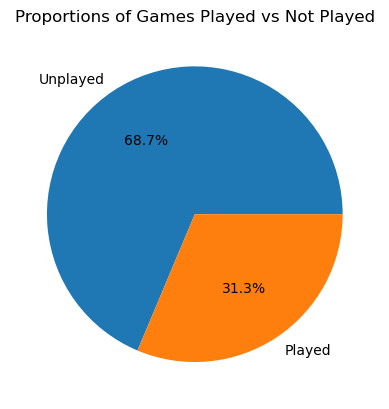

In [125]:
# Proportions of played vs not
play_status = [steam_df[steam_df['playtime_forever'] == 0].shape[0], steam_df[steam_df['playtime_forever'] != 0].shape[0]]
play_labels = ['Unplayed', 'Played']
plt.pie(play_status, labels=play_labels, autopct='%1.1f%%')
plt.title('Proportions of Games Played vs Not Played')

(94, 11)


Text(0.5, 1.0, 'Time Spent on Played Games')

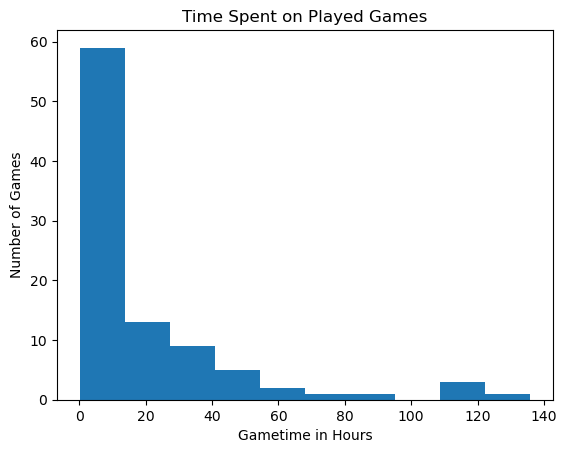

In [126]:
# Plot playtime of played games
played_games = steam_df.drop(steam_df[steam_df['playtime_forever'] == 0].index)
print(played_games.shape)
plt.hist(played_games['playtime_forever'] / 60, bins=10)
plt.ylabel('Number of Games')
plt.xlabel('Gametime in Hours')
plt.title('Time Spent on Played Games')

Text(0.5, 1.0, 'Top 10 Played Games')

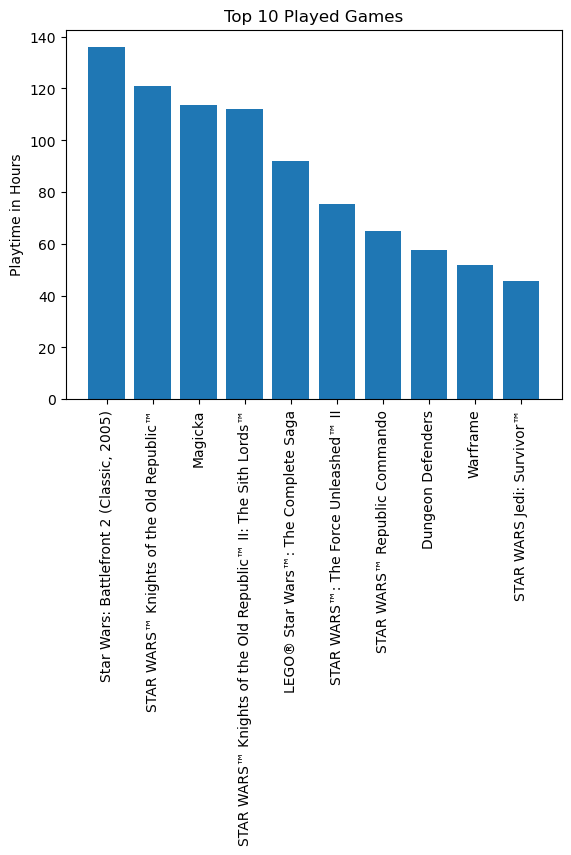

In [105]:
# Top 10 Played Games
top_10 = steam_df.sort_values(by='playtime_forever', ascending=False).head(10)
plt.bar(x=top_10['name'], height=top_10['playtime_forever'] / 60)
plt.xticks(rotation=90)
plt.ylabel('Playtime in Hours')
plt.title('Top 10 Played Games')

Text(0.5, 1.0, 'Past 2 Weeks Playtime')

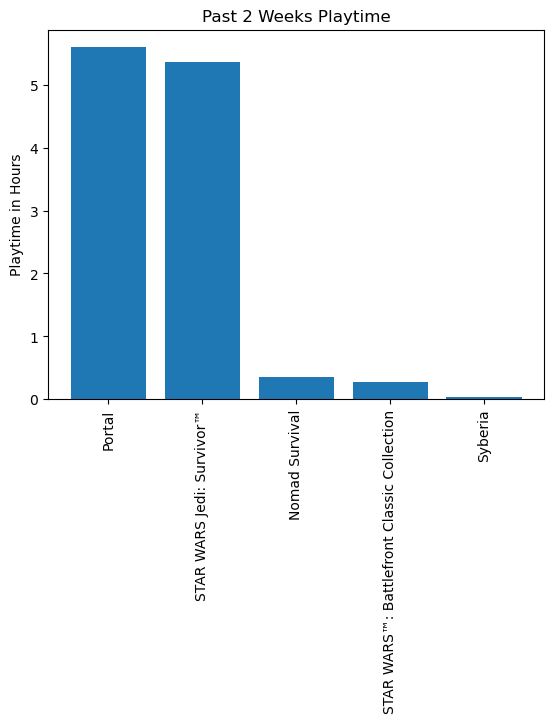

In [ ]:
# Most recent 2 weeks playtime by game
played_games.sort_values(by='playtime_forever', ascending=False).head(30)
recent = steam_df.dropna(subset='playtime_2weeks').sort_values('playtime_2weeks', ascending=False)
plt.bar(x=recent['name'], height=recent['playtime_2weeks'] / 60)
plt.xticks(rotation=90)
plt.ylabel('Playtime in Hours')
plt.title('Past 2 Weeks Playtime')